## Scattering matrix example
This Jupyter notebook calculates the scattering matrix for an example random network.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from complex_network.networks import network_factory
from complex_network.networks.network_spec import NetworkSpec

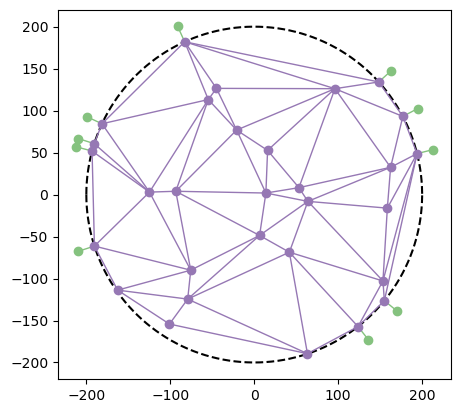

In [2]:
# Generate a random network

np.random.seed(2)
spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
)
network = network_factory.generate_network(spec)
network.draw(draw_boundary=spec.network_size, equal_aspect=True)

The network scattering matrix can be found using
```network.get_S_ee```. Note that this is a function of wavenumber.

The size of the resulting scattering matrix is determined by the number of exit nodes the network has (10 in this demonstration).


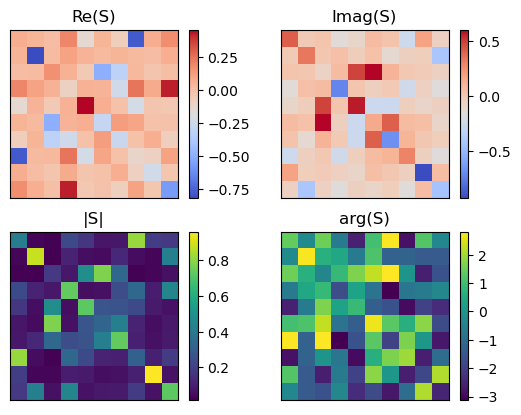

In [3]:
wavelength = 500e-9
k = 2 * np.pi / wavelength
S = network.get_S_ee(k)

fig, ax = plt.subplots(2, 2)

# Remove ticks and ticklabels
for b in ax:
    for a in b:
        a.set_xticks([])
        a.set_yticks([])
        a.set_xticklabels([])
        a.set_yticklabels([])

# Real part
cax_real = ax[0, 0].imshow(np.real(S), cmap="coolwarm")
fig.colorbar(cax_real, ax=ax[0, 0])
ax[0, 0].set_title("Re(S)")

# Imaginary part
cax_imag = ax[0, 1].imshow(np.imag(S), cmap="coolwarm")
fig.colorbar(cax_imag, ax=ax[0, 1])
ax[0, 1].set_title("Imag(S)")

# Magnitude
cax_abs = ax[1, 0].imshow(np.abs(S))
fig.colorbar(cax_abs, ax=ax[1, 0])
ax[1, 0].set_title("|S|")

# Phase
cax_phase = ax[1, 1].imshow(np.angle(S))
fig.colorbar(cax_phase, ax=ax[1, 1])
_ = ax[1, 1].set_title("arg(S)")